# PCA on CLAP embeddings

In [19]:
data_directory="data"
directory="/Users/amaiasagastimartinez/Desktop/SENS-Soundlights/code/sens-sensor"
print(f"Data directory is {data_directory}")
print(f"Working directory is {directory}")

Data directory is data
Working directory is /Users/amaiasagastimartinez/Desktop/SENS-Soundlights/code/sens-sensor


In [20]:
import os
import json
import numpy as np
import joblib 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set the working directory
import os
os.chdir(directory)

# Imports from this project


First, let's load the embeddings from folds 1 to 5 (no test fold 0)

In [21]:
# Example: Load your JSON file
dataset_path=os.path.join(data_directory, "files/ARAUS_CLAP_dataset/ARAUS_CLAP_dataset.json")
with open(dataset_path, 'r') as f:
    data = json.load(f)

# Initialize a list to store embeddings
embeddings = []

# Iterate through the JSON entries
for key in sorted(data.keys(), key=int):  # Sort keys numerically
    #if(data[key]["info"]["fold"]>0):
    clap_embedding = data[key]["CLAP"]  # Extract the "CLAP" key
    embeddings.append(clap_embedding)   # Add to the list

# Convert list of embeddings to a NumPy array
embeddings_matrix = np.array(embeddings)

# Display the shape of the resulting matrix
print(f"Embeddings matrix shape: {embeddings_matrix.shape}")

Embeddings matrix shape: (25440, 512)


Visualizing Variance Explained for All Components

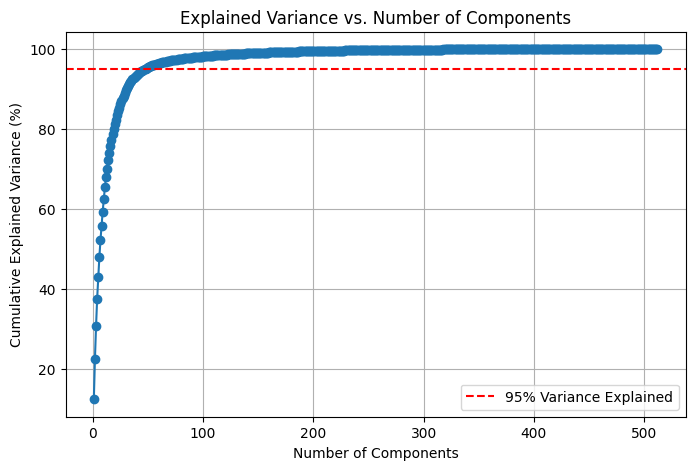

In [22]:
# Fit PCA for all components
pca_full = PCA().fit(embeddings_matrix)

# Plot cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100  # Cumulative percentage
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=95, color='r', linestyle='--', label="95% Variance Explained")  # threshold line
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.grid()
plt.show()

Develop PCA and check the percentage of variance explained by the PCA

In [23]:
# Apply PCA with desired number of components
n_components = 50  # Adjust this based on your selection
pca = PCA(n_components=n_components)
pca.fit(embeddings_matrix)

# Calculate the explained variance
explained_variance = np.sum(pca.explained_variance_ratio_) * 100  # Convert to percentage
print(f"PCA with {n_components} components explains {explained_variance:.2f}% of the variance.")


PCA with 50 components explains 95.46% of the variance.


Save the PCA operation

In [24]:
# Save the PCA transformation to a file
pca_saving_path=os.path.join(data_directory, "models",'pca_model.pkl')
joblib.dump(pca, pca_saving_path)


['data/models/pca_model.pkl']